In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

dataset=pd.read_csv(r"C:\Users\HP\Downloads\New folder\Churn_Modelling.csv")
x=dataset.iloc[:,3:-1].values
y=dataset.iloc[:,-1].values

In [26]:
dataset

,apst,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,delhi,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,bangalore,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,delhi,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,delhi,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,bangalore,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,delhi,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,delhi,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,delhi,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,mumbai,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
print(x)
print(y)

[[619 'delhi' 'Female' ... 1 1 101348.88]
 [608 'bangalore' 'Female' ... 0 1 112542.58]
 [502 'delhi' 'Female' ... 1 0 113931.57]
 ...
 [709 'delhi' 'Female' ... 0 1 42085.58]
 [772 'mumbai' 'Male' ... 1 0 92888.52]
 [792 'delhi' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [4]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,2]=le.fit_transform(x[:,2])

In [5]:
print(x)
print(y)

[[619 'delhi' 0 ... 1 1 101348.88]
 [608 'bangalore' 0 ... 0 1 112542.58]
 [502 'delhi' 0 ... 1 0 113931.57]
 ...
 [709 'delhi' 0 ... 0 1 42085.58]
 [772 'mumbai' 1 ... 1 0 92888.52]
 [792 'delhi' 0 ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [7]:
print(x)
print(y)

[[0.0 1.0 0.0 ... 1 1 101348.88]
 [1.0 0.0 0.0 ... 0 1 112542.58]
 [0.0 1.0 0.0 ... 1 0 113931.57]
 ...
 [0.0 1.0 0.0 ... 0 1 42085.58]
 [0.0 0.0 1.0 ... 1 0 92888.52]
 [0.0 1.0 0.0 ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[1.0 0.0 0.0 ... 1 0 163830.64]
 [0.0 0.0 1.0 ... 1 1 57098.0]
 [0.0 1.0 0.0 ... 1 0 185630.76]
 ...
 [0.0 1.0 0.0 ... 1 0 181429.87]
 [1.0 0.0 0.0 ... 1 1 148750.16]
 [0.0 0.0 1.0 ... 1 0 118855.26]]
[[0.0 0.0 1.0 ... 1 1 192852.67]
 [0.0 1.0 0.0 ... 1 0 128702.1]
 [1.0 0.0 0.0 ... 1 1 75732.25]
 ...
 [1.0 0.0 0.0 ... 1 0 141533.19]
 [0.0 0.0 1.0 ... 1 1 11276.48]
 [0.0 0.0 1.0 ... 1 0 192950.6]]
[0 0 0 ... 0 0 1]
[0 1 0 ... 0 0 0]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# LOGISTIC REGRESSION

In [11]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(penalty='l2',dual=False,C=1.0,fit_intercept=True)
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report
ac=accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
bias=classifier.score(x_train,y_train)
variance=classifier.score(x_test,y_test)

print('BIAS:',bias)
print('VARIANCE:',variance)
print('ACCURACY:',ac)
print('CONFUSION MATRIX:',cr)

BIAS: 0.8085
VARIANCE: 0.811
ACCURACY: 0.811
CONFUSION MATRIX:               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000



# DECISION TREE

BIAS: 0.896125
VARIANCE: 0.8455
ACCURACY: 0.8455
CONFUSION MATRIX:               precision    recall  f1-score   support

           0       0.89      0.92      0.91      1595
           1       0.64      0.54      0.59       405

    accuracy                           0.85      2000
   macro avg       0.76      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000



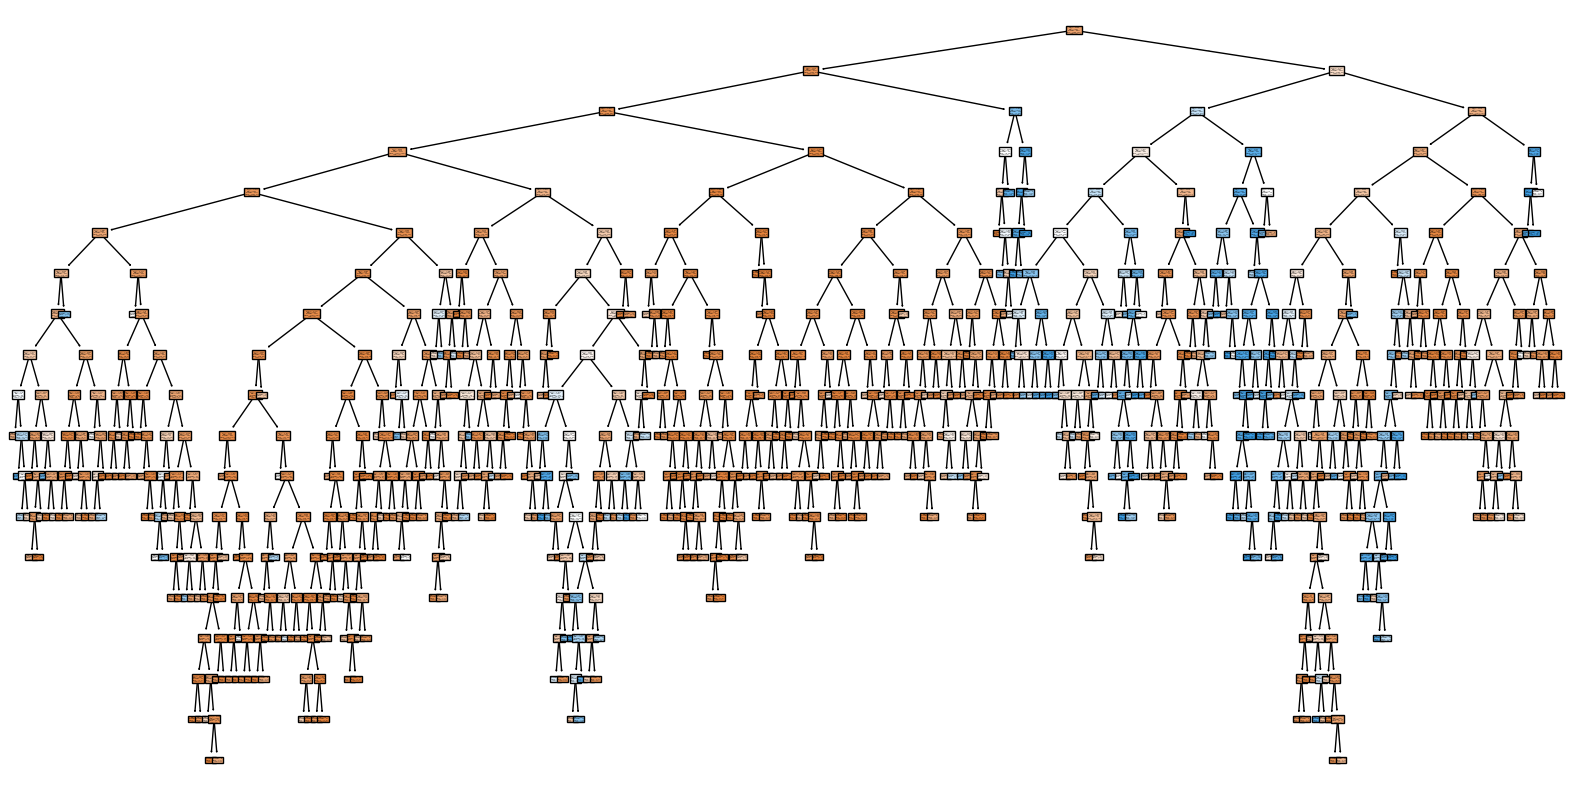

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=20,min_samples_leaf=8)
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report
ac=accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
bias=classifier.score(x_train,y_train)
variance=classifier.score(x_test,y_test)

print('BIAS:',bias)
print('VARIANCE:',variance)
print('ACCURACY:',ac)
print('CONFUSION MATRIX:',cr)

# Visualinzing the Tree:
    
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(classifier, filled=True, feature_names=None, class_names=['No', 'Yes'])
plt.show()

# SUPPORT VECTOR MACHINE

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
classifier.fit(x_train, y_train)

'''
These are the parameters:
classifier = SVC(kernel='linear')
classifier = SVC(kernel='poly', degree=3)
classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
'''

y_pred=classifier.predict(x_test)


from sklearn.metrics import accuracy_score,classification_report
ac=accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
bias=classifier.score(x_train,y_train)
variance=classifier.score(x_test,y_test)

print('BIAS:',bias)
print('VARIANCE:',variance)
print('ACCURACY:',ac)
print('CONFUSION MATRIX:',cr)

BIAS: 0.864875
VARIANCE: 0.865
ACCURACY: 0.865
CONFUSION MATRIX:               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.80      0.44      0.57       405

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



# XGBOOST

In [14]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)


from sklearn.metrics import accuracy_score,classification_report
ac=accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
bias=classifier.score(x_train,y_train)
variance=classifier.score(x_test,y_test)

print('BIAS:',bias)
print('VARIANCE:',variance)
print('ACCURACY:',ac)
print('CONFUSION MATRIX:',cr)

BIAS: 0.953875
VARIANCE: 0.8545
ACCURACY: 0.8545
CONFUSION MATRIX:               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.68      0.53      0.59       405

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.85      0.85      0.85      2000



# K-NEIGHBORS CLASSIFIER

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

# Predict results
y_pred = classifier.predict(x_test)


from sklearn.metrics import accuracy_score,classification_report
ac=accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
bias=classifier.score(x_train,y_train)
variance=classifier.score(x_test,y_test)


print('BIAS:',bias)
print('VARIANCE:',variance)
print('ACCURACY:',ac)
print('CONFUSION MATRIX:',cr)

BIAS: 0.871375
VARIANCE: 0.827
ACCURACY: 0.827
CONFUSION MATRIX:               precision    recall  f1-score   support

           0       0.86      0.93      0.90      1595
           1       0.61      0.41      0.49       405

    accuracy                           0.83      2000
   macro avg       0.73      0.67      0.69      2000
weighted avg       0.81      0.83      0.81      2000



# RANDOMFOREST CLASSIFIER

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0,n_estimators=30,max_depth=8)
classifier.fit(x_train, y_train)

y_pred=classifier.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report
ac=accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
bias=classifier.score(x_train,y_train)
variance=classifier.score(x_test,y_test)

print('BIAS:',bias)
print('VARIANCE:',variance)
print('ACCURACY:',ac)
print('CONFUSION MATRIX:',cr)



BIAS: 0.880625
VARIANCE: 0.8715
ACCURACY: 0.8715
CONFUSION MATRIX:               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1595
           1       0.81      0.48      0.60       405

    accuracy                           0.87      2000
   macro avg       0.85      0.72      0.76      2000
weighted avg       0.87      0.87      0.86      2000



# ADABOOST CLASSIFIER

In [17]:
from sklearn.ensemble import AdaBoostClassifier

# Default base learner = DecisionTreeClassifier(max_depth=1)
classifier= AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
classifier.fit(x_train, y_train)

y_pred=classifier.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report
ac=accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
bias=classifier.score(x_train,y_train)
variance=classifier.score(x_test,y_test)

print('BIAS:',bias)
print('VARIANCE:',variance)
print('ACCURACY:',ac)
print('CONFUSION MATRIX:',cr)



BIAS: 0.85475
VARIANCE: 0.8625
ACCURACY: 0.8625
CONFUSION MATRIX:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.76      0.47      0.58       405

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [18]:
# ROC AUC CURVE Logistic Regression

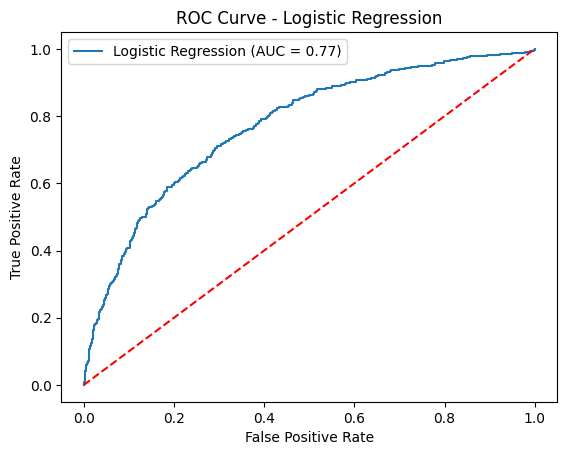

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

clf = LogisticRegression()
clf.fit(x_train, y_train)
y_prob = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


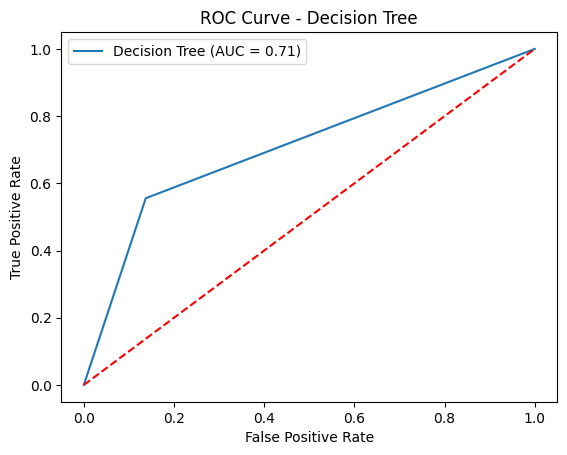

In [20]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_prob = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()


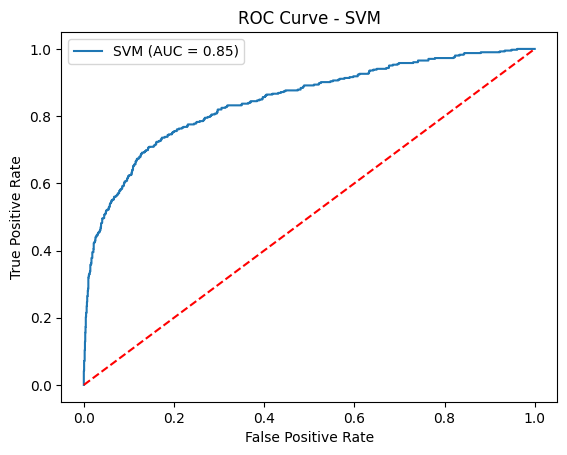

In [21]:
from sklearn.svm import SVC

clf = SVC(probability=True)
clf.fit(x_train, y_train)
y_prob = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='SVM (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()


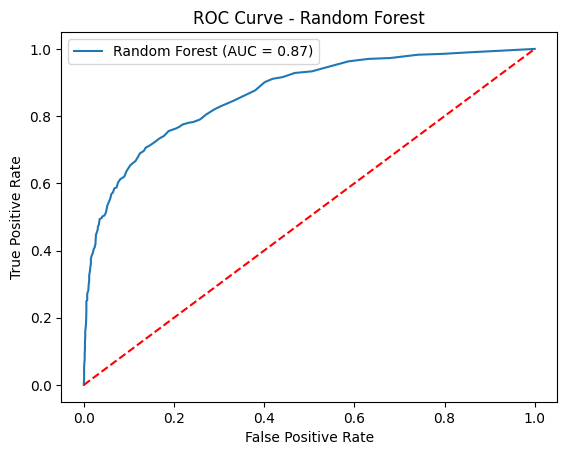

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_prob = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


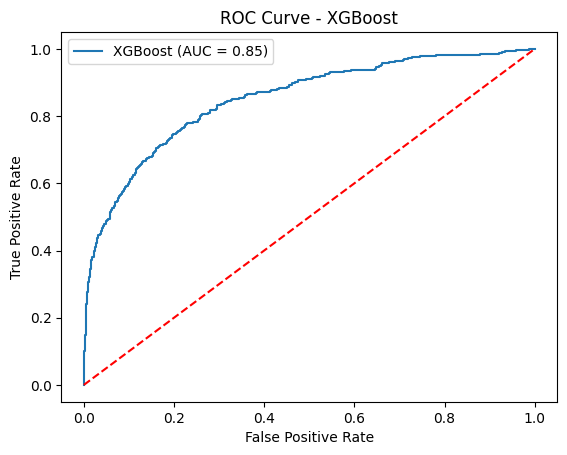

In [23]:
from xgboost import XGBClassifier

clf = XGBClassifier(eval_metric='logloss')
clf.fit(x_train, y_train)
y_prob = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()


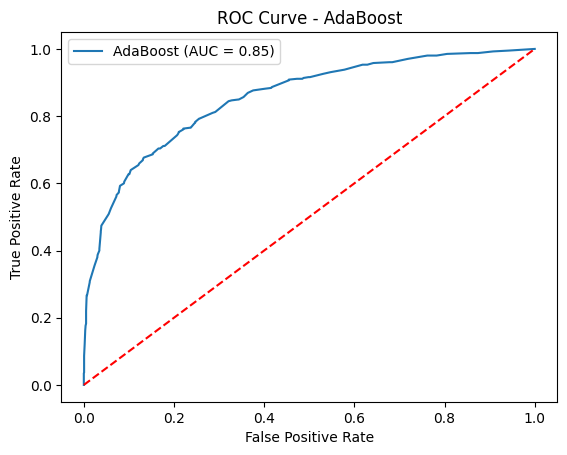

In [24]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(x_train, y_train)
y_prob = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AdaBoost (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend()
plt.show()


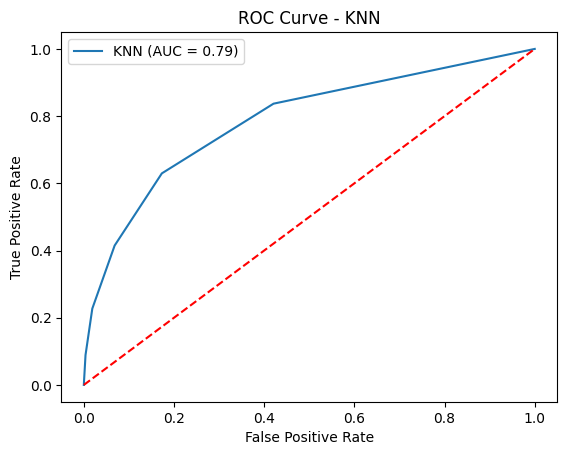

In [25]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
y_prob = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='KNN (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.show()
